<a href="https://colab.research.google.com/github/marcelounb/ML-Mastery-with-Python-Course/blob/master/testando_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'2.2.0-rc2'

In [0]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [0]:
diabetes = pd.read_csv('/content/diabetes_moddd_with_title.csv')

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

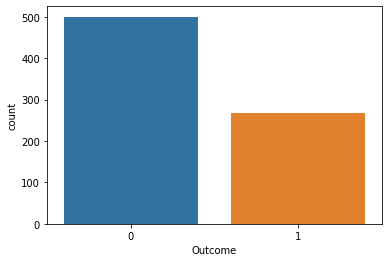

In [7]:
sns.countplot(x='Outcome', data = diabetes)

In [0]:
X = diabetes.iloc[:, 0:8].values

In [15]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [0]:
y = diabetes.iloc[:, -1].values

In [13]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

# Comparing the best machine learning model

In [0]:
models = [] 
models.append(('LR', LogisticRegression(max_iter=200))) 
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB())) 
models.append(('SVM', SVC())) 

In [26]:
results = [] 
names = []
message = []
scoring = 'accuracy' 
for name, model in models: 
  kfold = KFold(n_splits=100, shuffle=True, random_state=7) 
  cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring) 
  results.append(cv_results)
  names.append(name) 
  message.append([name, cv_results.mean(), cv_results.std()])
message

[['LR', 0.7807142857142857, 0.13517467912871486],
 ['LDA', 0.7744642857142857, 0.13815140226932043],
 ['KNN', 0.7157142857142854, 0.17601165313926329],
 ['CART', 0.7007142857142858, 0.15803561339786934],
 ['NB', 0.7542857142857143, 0.14155928303097928],
 ['SVM', 0.76375, 0.14336639143773391]]

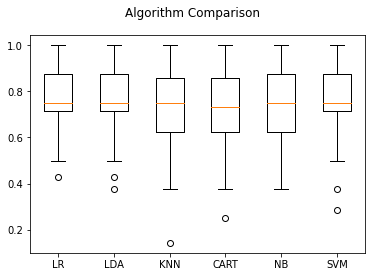

In [27]:
# boxplot algorithm comparison 
fig = plt.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

In [0]:
# So linear regression and Linear Discrimnant Analisys seems like the best performing results

# Scaling before training the model

In [34]:
X[0]  # Unchanged data

array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
        50.   ])

In [0]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [36]:
X[0]  # scaled data

array([ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
        0.20401277,  0.46849198,  1.4259954 ])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)  # Divisao da base de dados entre treinamento e teste

In [39]:
X_train.shape

(614, 8)

In [41]:
X_test.shape

(154, 8)

# Construção e treinamento do modelo de rede neural

In [43]:
# 8 -> 400 -> 400 -> 1 :: Input shape
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(8, )))
classifier.add(tf.keras.layers.Dropout(0.2))  # Vai zerar 20% dos neuronios de cima
classifier.add(tf.keras.layers.Dense(units=400, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.2))  # Vai zerar 20% dos neuronios de cima
classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               3600      
_________________________________________________________________
dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 401       
Total params: 164,401
Trainable params: 164,401
Non-trainable params: 0
_________________________________________________________________


In [0]:
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [45]:
epochs_hist = classifier.fit(X_train, y_train, epochs = 200)

Epoch 1/200
20/20 [==============================] - 0s 3ms/step - loss: 0.5531 - accuracy: 0.7134
Epoch 2/200
20/20 [==============================] - 0s 3ms/step - loss: 0.5005 - accuracy: 0.7866
Epoch 3/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4553 - accuracy: 0.7769
Epoch 4/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4469 - accuracy: 0.7752
Epoch 5/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4349 - accuracy: 0.7801
Epoch 6/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4322 - accuracy: 0.7915
Epoch 7/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4259 - accuracy: 0.7997
Epoch 8/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4178 - accuracy: 0.8029
Epoch 9/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4060 - accuracy: 0.7980
Epoch 10/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4313 - accuracy: 0.8062
Epoch 11/

In [0]:
y_pred = classifier.predict(X_test)

In [47]:
y_pred

array([[4.47065349e-06],
       [1.05766118e-01],
       [1.11338615e-01],
       [2.36517191e-03],
       [2.35055795e-05],
       [7.15067983e-03],
       [4.08208085e-11],
       [1.58153330e-06],
       [1.20891386e-07],
       [7.73609221e-01],
       [1.85407508e-15],
       [9.91591811e-01],
       [4.53063103e-06],
       [9.52629309e-10],
       [4.22253743e-06],
       [6.95060968e-01],
       [4.18626200e-08],
       [4.44998413e-01],
       [9.99950409e-01],
       [1.20344073e-01],
       [1.00184451e-07],
       [4.47074271e-08],
       [2.38890516e-06],
       [9.97248173e-01],
       [1.91650748e-01],
       [9.37547147e-01],
       [9.90435481e-01],
       [9.99999642e-01],
       [9.99992371e-01],
       [2.24581659e-02],
       [3.21158135e-11],
       [1.13103642e-08],
       [3.25202942e-03],
       [3.45975786e-01],
       [2.11741863e-05],
       [9.00655985e-04],
       [9.99993265e-01],
       [3.43878992e-06],
       [5.05423546e-02],
       [2.68369581e-06],


In [48]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [

In [49]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

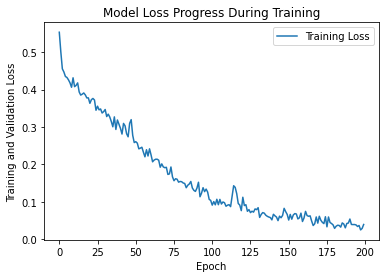

In [50]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss']);

Making a prediction

In [51]:
# Making a prediction: Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome**not this one - outcome expected to be 1
X_test_previsao = np.array([[0,118,84,47,230,45.8,0.551,31]])
X_test_previsao_scaled = sc.fit_transform(X_test_previsao)
y_predict_previsao_scaled = classifier.predict(X_test_previsao_scaled)
y_predict_previsao_scaled

array([[0.79958457]], dtype=float32)

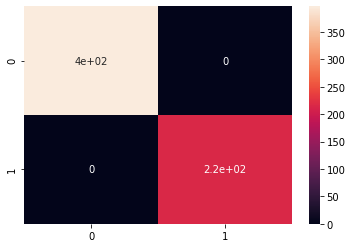

In [52]:
y_train_pred = classifier.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True);

In [53]:
cm

array([[397,   0],
       [  0, 217]])

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77       103
           1       0.55      0.71      0.62        51

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.74      0.71      0.72       154

